In [1]:
! pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [3]:
df1 = pd.read_csv('descriptor_pIC50_values.csv')
df1

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,pIC50
0,module 'numpy' has no attribute 'float' (ABC),module 'numpy' has no attribute 'float' (ABCGG...,0,0,28.895676,2.487585,4.886232,28.895676,1.313440,4.022828,...,70.113048,298.106590,8.280739,1057,34,114.0,135.0,6.777778,4.972222,4.721246
1,module 'numpy' has no attribute 'float' (ABC),module 'numpy' has no attribute 'float' (ABCGG...,0,0,26.386302,2.486496,4.884242,26.386302,1.319315,3.937680,...,67.845085,268.096026,8.378001,778,32,106.0,127.0,6.277778,4.472222,4.161151
2,module 'numpy' has no attribute 'float' (ABC),module 'numpy' has no attribute 'float' (ABCGG...,0,0,44.199339,2.343889,4.682750,44.199339,1.299981,4.445065,...,84.900606,591.091342,9.851522,4403,45,172.0,196.0,9.500000,7.583333,7.221849
3,module 'numpy' has no attribute 'float' (ABC),module 'numpy' has no attribute 'float' (ABCGG...,1,0,36.494018,2.492749,4.899068,36.494018,1.303358,4.272616,...,77.553909,380.148455,7.919759,2061,46,150.0,179.0,8.611111,6.111111,5.309804
4,module 'numpy' has no attribute 'float' (ABC),module 'numpy' has no attribute 'float' (ABCGG...,0,0,29.773183,2.489223,4.889374,29.773183,1.294486,4.066481,...,71.374322,312.122240,8.003134,1191,36,120.0,142.0,7.638889,5.138889,4.756962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,module 'numpy' has no attribute 'float' (ABC),module 'numpy' has no attribute 'float' (ABCGG...,0,2,29.446094,2.517905,4.834880,29.446094,1.338459,4.055019,...,72.719477,313.088498,8.461851,1015,35,122.0,148.0,5.888889,4.750000,7.522879
370,module 'numpy' has no attribute 'float' (ABC),module 'numpy' has no attribute 'float' (ABCGG...,0,0,22.579004,2.372234,4.661636,22.579004,1.254389,3.805979,...,64.269341,267.015917,11.125663,641,24,90.0,103.0,6.666667,4.000000,5.681937
371,module 'numpy' has no attribute 'float' (ABC),module 'numpy' has no attribute 'float' (ABCGG...,0,0,25.564313,2.521946,4.892582,25.564313,1.278216,3.941919,...,68.358647,312.043233,9.177742,784,33,108.0,130.0,6.888889,4.388889,5.982967
372,module 'numpy' has no attribute 'float' (ABC),module 'numpy' has no attribute 'float' (ABCGG...,0,0,32.806308,2.571616,5.014564,32.806308,1.312252,4.177364,...,76.442324,378.065031,9.221098,1362,44,140.0,172.0,8.472222,5.388889,7.853872


In [4]:
X = df1.drop('pIC50', axis=1)
X = df1.drop(['pIC50', 'ABC', 'ABCGG'], axis=1)
X

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,28.895676,2.487585,4.886232,28.895676,1.313440,4.022828,3.912407,0.177837,...,9.996021,70.113048,298.106590,8.280739,1057,34,114.0,135.0,6.777778,4.972222
1,0,0,26.386302,2.486496,4.884242,26.386302,1.319315,3.937680,3.862955,0.193148,...,9.968104,67.845085,268.096026,8.378001,778,32,106.0,127.0,6.277778,4.472222
2,0,0,44.199339,2.343889,4.682750,44.199339,1.299981,4.445065,4.779293,0.140567,...,10.171413,84.900606,591.091342,9.851522,4403,45,172.0,196.0,9.500000,7.583333
3,1,0,36.494018,2.492749,4.899068,36.494018,1.303358,4.272616,4.255922,0.151997,...,10.304710,77.553909,380.148455,7.919759,2061,46,150.0,179.0,8.611111,6.111111
4,0,0,29.773183,2.489223,4.889374,29.773183,1.294486,4.066481,3.972061,0.172698,...,10.047631,71.374322,312.122240,8.003134,1191,36,120.0,142.0,7.638889,5.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,2,29.446094,2.517905,4.834880,29.446094,1.338459,4.055019,4.082666,0.185576,...,10.114599,72.719477,313.088498,8.461851,1015,35,122.0,148.0,5.888889,4.750000
370,0,0,22.579004,2.372234,4.661636,22.579004,1.254389,3.805979,3.690273,0.205015,...,9.602990,64.269341,267.015917,11.125663,641,24,90.0,103.0,6.666667,4.000000
371,0,0,25.564313,2.521946,4.892582,25.564313,1.278216,3.941919,3.840229,0.192011,...,10.044336,68.358647,312.043233,9.177742,784,33,108.0,130.0,6.888889,4.388889
372,0,0,32.806308,2.571616,5.014564,32.806308,1.312252,4.177364,4.246526,0.169861,...,10.355104,76.442324,378.065031,9.221098,1362,44,140.0,172.0,8.472222,5.388889


In [5]:
Y = df1.pIC50
Y

0      4.721246
1      4.161151
2      7.221849
3      5.309804
4      4.756962
         ...   
369    7.522879
370    5.681937
371    5.982967
372    7.853872
373    4.638272
Name: pIC50, Length: 374, dtype: float64

In [6]:
X.shape


(374, 1611)

In [7]:
Y.shape


(374,)

In [8]:
X = X.drop(columns=X.select_dtypes(include=['object', 'string']).columns)
X.to_csv('number_only_data.csv', index=False)
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1 - .8)))
X = selection.fit_transform(X)


In [9]:
X.shape

(374, 665)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [11]:
X_train.shape, Y_train.shape


((299, 665), (299,))

In [12]:
X_test.shape, Y_test.shape

((75, 665), (75,))

In [13]:
import numpy as np
np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.2564108296706864

In [14]:
Y_pred = model.predict(X_test)


<function matplotlib.pyplot.show(close=None, block=None)>

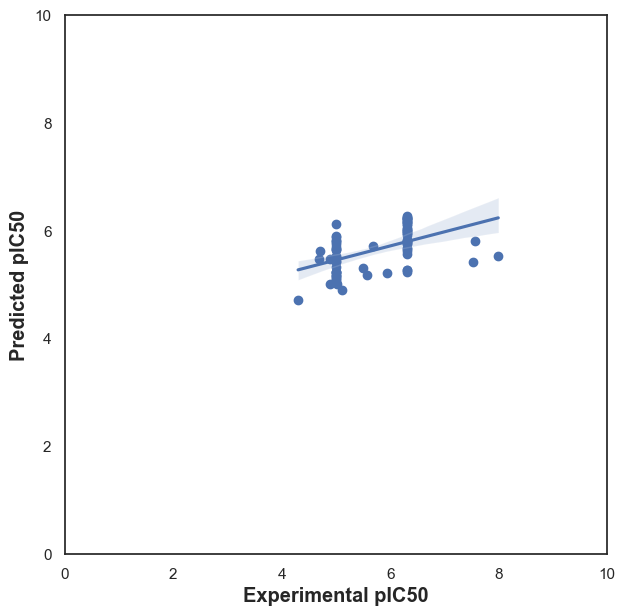

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':1.0})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.figure.set_size_inches(7, 7)
plt.savefig('Scatter plot of Experimental vs Predicted pIC50 Values')
plt.show


In [32]:
! pip install lazypredict


In [34]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor


In [36]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 *(1 - .8)))
X = selection.fit_transform(X)
X.shape


(374, 665)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [41]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52268
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 660
[LightGBM] [Info] Start training from score 5.637335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52268
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 660
[LightGBM] [Info] Start training from score 5.637335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [43]:
predictions_train


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SGDRegressor,16321952575051491328.00,-20101196627664084992.00,3353331214.81,0.05
Lars,11835948471301052416.00,-14576486875729819648.00,2855564200.56,0.23
KernelRidge,47.23,-55.93,5.64,0.06
QuantileRegressor,1.83,-0.02,0.75,0.31
LassoLars,1.81,0.00,0.75,0.04
DummyRegressor,1.81,0.00,0.75,0.03
ElasticNet,1.81,0.00,0.75,0.03
Lasso,1.81,0.00,0.75,0.05
LarsCV,1.69,0.15,0.69,2.03


In [45]:
predictions_test


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,890300783744937975873536.00,-7110375178287274973462528.00,1923780278801.02,0.32
SGDRegressor,3234943427595059200.00,-25835831969036218368.00,3667080431.27,0.04
LinearRegression,11.02,-79.00,6.45,0.08
TransformedTargetRegressor,11.02,-79.00,6.45,0.05
GaussianProcessRegressor,8.69,-60.39,5.65,0.09
KernelRidge,8.57,-59.49,5.61,0.04
LinearSVR,1.34,-1.73,1.19,0.53
MLPRegressor,1.25,-0.97,1.01,1.27
DecisionTreeRegressor,1.23,-0.85,0.98,0.19


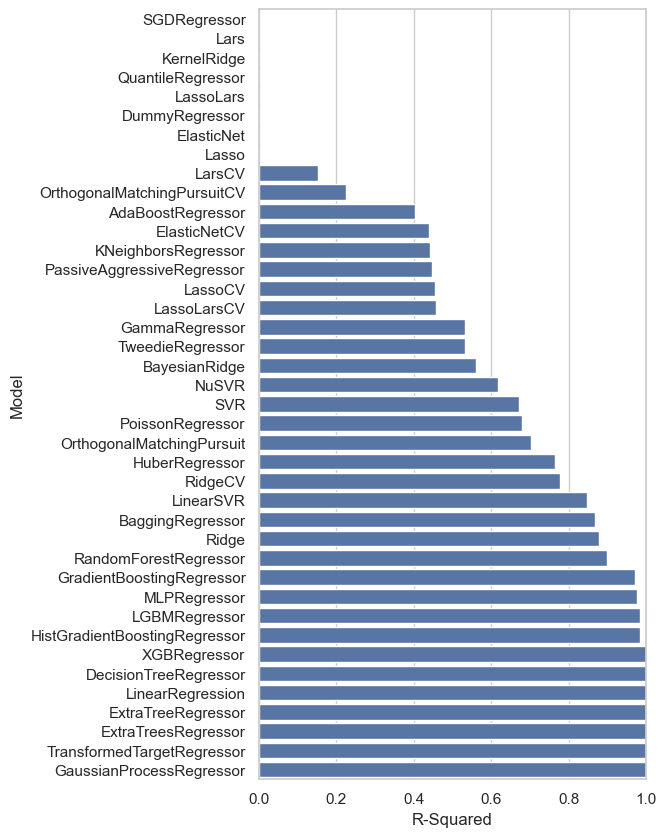

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.savefig('Data visualization of model performance.pdf')


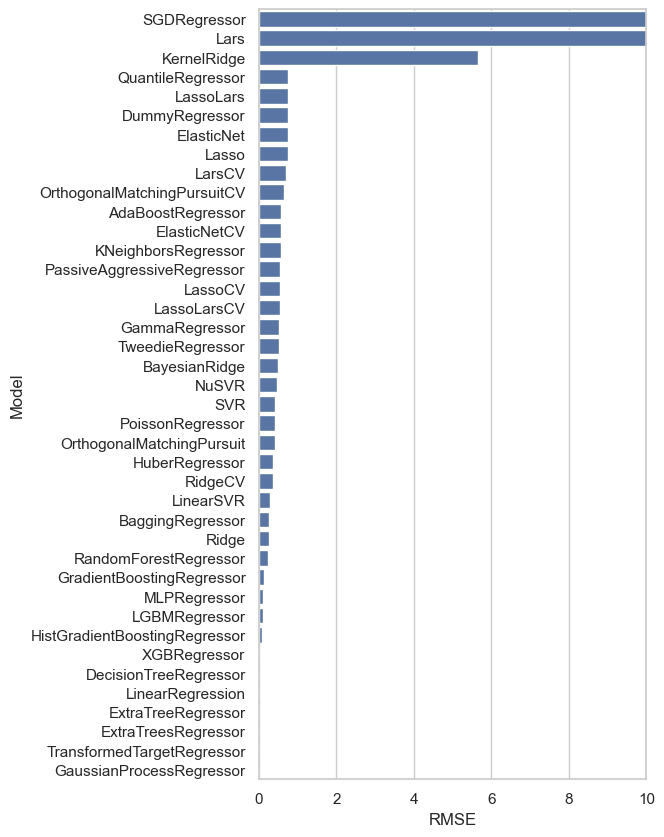

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

plt.savefig('Bar plot of RMSE values.pdf')


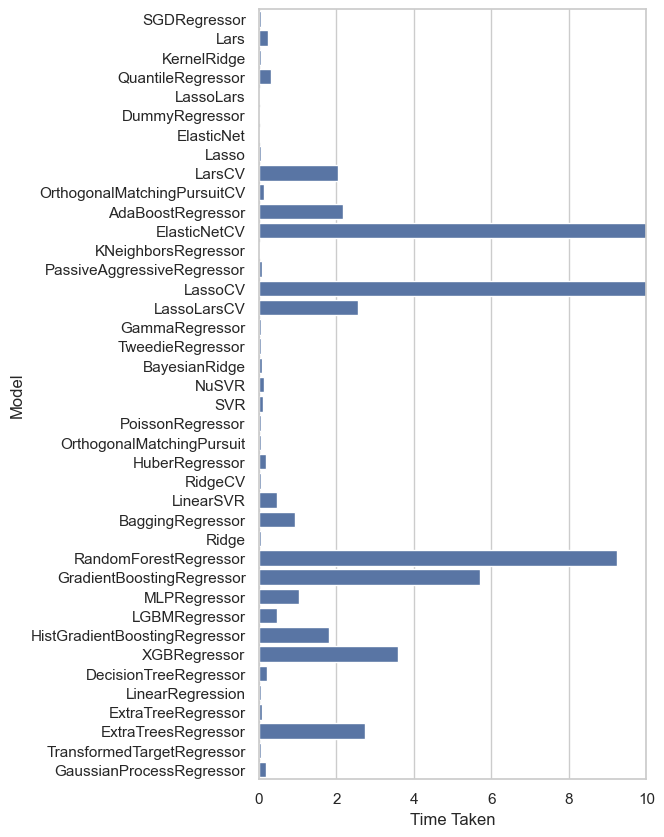

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

plt.savefig('Bar plot of calculation time.pdf')


In [53]:
! zip -r results.zip . -i *.csv *.pdf


'zip' is not recognized as an internal or external command,
operable program or batch file.
